In [20]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
train_df = pd.read_csv('../project1/dss-regression-datasets/project-toyotacorolla-data/train.csv')
#데이터 확인
train_df.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1014,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8950,71,10,1998,29000,Petrol,86,1,...,0,1,0,0,0,1,0,0,0,0
1015,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
#양적변수 8개
cols_real = ['Age_08_04','Mfg_Year','KM','HP','CC','Weight','Guarantee_Period','Quarterly_Tax']

#질적변수 27개
cols_cat = ['Mfg_Month','Fuel_Type','Met_Color','Color','Automatic',
           'Doors','Cylinders','Gears','Mfr_Guarantee','BOVAG_Guarantee',
            'ABS','Airbag_1','Airbag_2','Airco','Automatic_airco',
           'Boardcomputer','CD_Player','Central_Lock','Power_Steering','Radio',
           'Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette',
           'Parking_Assistant','Tow_Bar']
#model 제외
print(len(cols_real),len(cols_cat))

8 27


### 변수 'model' 제외

In [6]:
#독립변수 데이터 프레임 만들기
df_r = train_df[cols_real]
df_c = train_df[cols_cat]

X = pd.concat([df_r, df_c], axis = 1)
X.tail()

,Age_08_04,Mfg_Year,KM,HP,CC,Weight,Guarantee_Period,Quarterly_Tax,Mfg_Month,Fuel_Type,...,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1014,71,1998,29000,86,1300,1045,3,69,10,Petrol,...,0,1,0,0,0,1,0,0,0,0
1015,69,1998,20544,86,1300,1025,3,69,12,Petrol,...,1,1,0,1,1,1,0,0,0,0
1016,71,1998,17016,86,1300,1015,3,69,10,Petrol,...,0,1,0,0,0,1,0,0,0,0
1017,70,1998,16916,86,1300,1015,3,69,11,Petrol,...,0,0,0,0,0,1,0,0,0,0
1018,76,1998,1,110,1600,1114,3,19,5,Petrol,...,0,1,0,0,0,0,0,0,0,0


In [7]:
#종속변수 데이터 프레임 만들기
val = ['Price', 'Id']

y = train_df[val]
y.tail()

,Price,Id
1014,8950,1434
1015,7500,1438
1016,8500,1440
1017,7250,1441
1018,6950,1442


# Price와 양적변수들 간의 상관분석

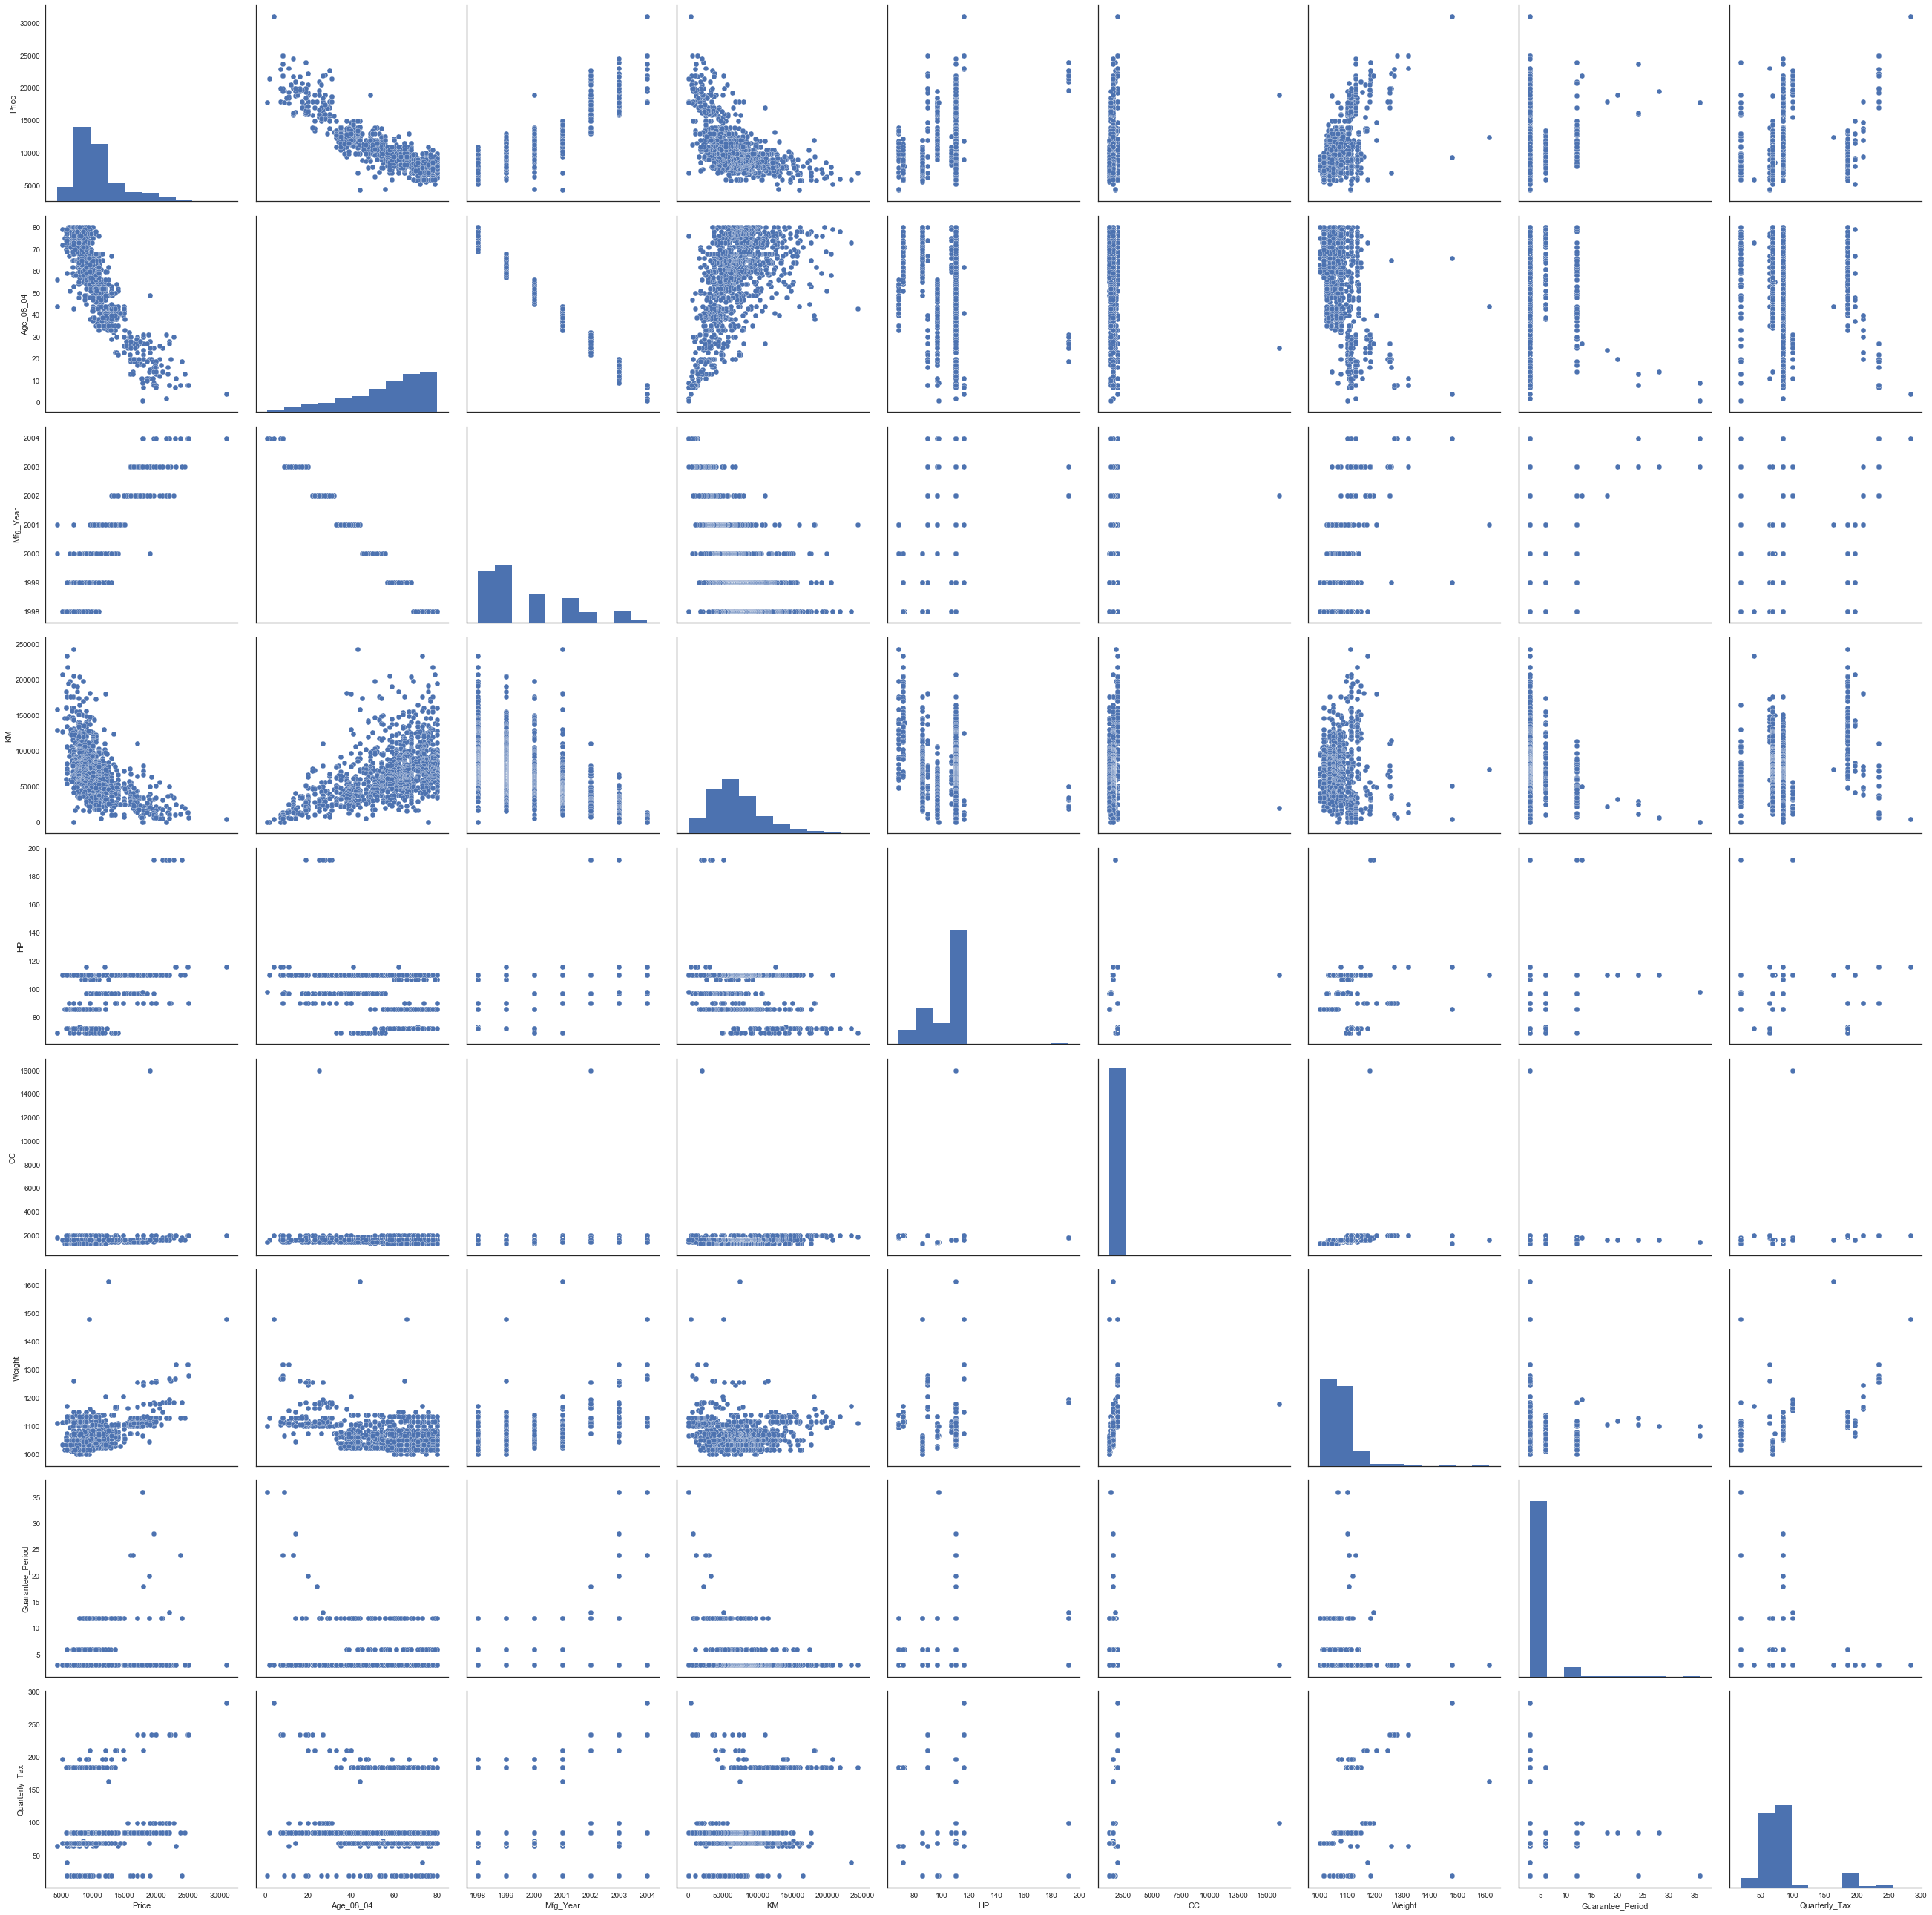

In [8]:
with plt.style.context(('seaborn-white')):
     sns_plot = sns.pairplot(pd.concat([train_df['Price'],train_df[cols_real[:]]], axis=1) ,size=4.)
    
plt.show()

In [9]:
cor_real = train_df[cols_real[:]].corr()

cor_real

,Age_08_04,Mfg_Year,KM,HP,CC,Weight,Guarantee_Period,Quarterly_Tax
Age_08_04,1.000000,-0.984218,0.516486,-0.164049,-0.092059,-0.463990,-0.166382,-0.172089
Mfg_Year,-0.984218,1.000000,-0.517981,0.170122,0.085745,0.471215,0.160928,0.173047
KM,0.516486,-0.517981,1.000000,-0.350617,0.083882,-0.011154,-0.136274,0.289799
HP,-0.164049,0.170122,-0.350617,1.000000,0.032090,0.078747,0.090731,-0.324570
CC,-0.092059,0.085745,0.083882,0.032090,1.000000,0.295151,-0.016583,0.265723
Weight,-0.463990,0.471215,-0.011154,0.078747,0.295151,1.000000,0.001592,0.585494
Guarantee_Period,-0.166382,0.160928,-0.136274,0.090731,-0.016583,0.001592,1.000000,-0.156661
Quarterly_Tax,-0.172089,0.173047,0.289799,-0.324570,0.265723,0.585494,-0.156661,1.000000


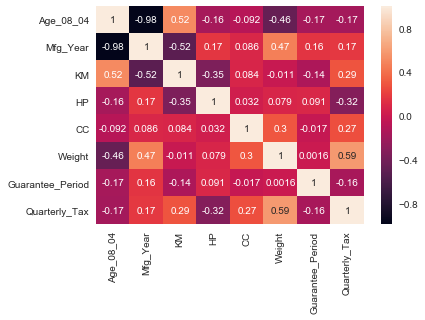

In [10]:
sns.heatmap(cor_real, annot=True, fmt='0.2g')

plt.show()

### Mfg_Year 와 Age_08_04가 큰 상관을 보여 둘 중하나를 제거해 준다

## Price와 질적변수들과의 상관분석

In [11]:
def display_multi_boxplots(start_feature_name, row, col ):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)
        
        nums = row * col
        start_idx = cols_cat.index(start_feature_name)
        
        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=train_df[cols_cat[start_idx + num]], y = y['Price'], palette='Set3', ax=ax)
                
            except: 
                pass

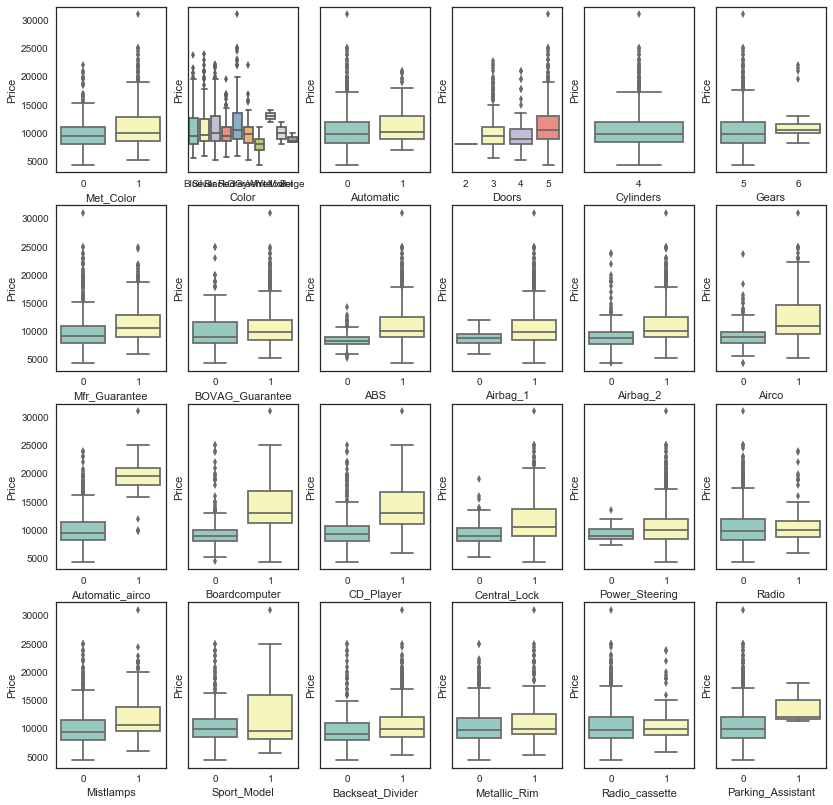

In [12]:
display_multi_boxplots('Met_Color', 4, 6)
plt.show()

In [13]:
cols_cat2 = ['Price','Mfg_Month','Met_Color','Automatic',
           'Cylinders','Gears','Mfr_Guarantee','BOVAG_Guarantee',
            'ABS','Airbag_1','Airbag_2','Airco','Automatic_airco',
           'Boardcomputer','CD_Player','Central_Lock','Power_Steering','Radio',
           'Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette',
           'Parking_Assistant','Tow_Bar']
cat_p = train_df[cols_cat2]
cor_cat = cat_p[:].corr()

cor_cat

,Price,Mfg_Month,Met_Color,Automatic,Cylinders,Gears,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,...,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Price,1.000000,-0.044255,0.152843,0.068063,NaN,0.053457,0.165026,0.035516,0.304380,0.095595,...,0.361207,0.064949,-0.023749,0.227719,0.166143,0.081085,0.136991,-0.024527,0.044791,-0.156850
Mfg_Month,-0.044255,1.000000,0.015821,0.027072,NaN,-0.008836,-0.008864,0.001220,0.097162,0.029249,...,0.013828,-0.032970,0.030851,-0.012792,0.030194,0.019131,0.026802,0.030851,-0.002427,-0.026882
Met_Color,0.152843,0.015821,1.000000,-0.034378,NaN,-0.005133,0.174011,0.026156,0.043723,0.130535,...,0.179711,0.111136,0.083315,0.042604,0.000755,0.044419,0.069026,0.083315,0.038198,0.153169
Automatic,0.068063,0.027072,-0.034378,1.000000,NaN,-0.016574,0.022505,0.047463,-0.002017,-0.030471,...,0.017367,-0.013971,-0.039443,0.027579,0.035652,0.022814,-0.068079,-0.039443,0.143009,0.007890
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.053457,-0.008836,-0.005133,-0.016574,NaN,1.000000,0.003648,0.023741,0.081937,0.030317,...,0.143897,0.027694,0.031648,0.234214,0.164950,0.036974,0.301766,0.031648,-0.009300,-0.027411
Mfr_Guarantee,0.165026,-0.008864,0.174011,0.022505,NaN,0.003648,1.000000,0.255314,0.085436,0.064103,...,0.053641,0.044235,-0.037127,0.089785,0.063635,0.266640,0.021822,-0.037127,-0.007754,-0.020290
BOVAG_Guarantee,0.035516,0.001220,0.026156,0.047463,NaN,0.023741,0.255314,1.000000,0.147776,0.225758,...,0.008657,0.178313,-0.041156,0.134309,0.186676,0.470460,0.066930,-0.041156,0.019381,0.028022
ABS,0.304380,0.097162,0.043723,-0.002017,NaN,0.081937,0.085436,0.147776,1.000000,0.281975,...,0.103919,0.258100,-0.057437,0.169801,0.229996,0.237322,0.097009,-0.057437,0.026014,-0.050837
Airbag_1,0.095595,0.029249,0.130535,-0.030471,NaN,0.030317,0.064103,0.225758,0.281975,1.000000,...,0.141083,0.551131,0.006725,0.092270,0.119305,0.311733,0.073147,-0.009631,0.009625,0.046387


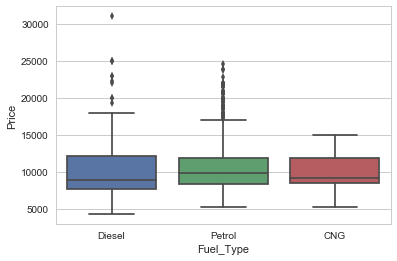

Petrol    904
Diesel    106
CNG         9
Name: Fuel_Type, dtype: int64

In [14]:
sns.boxplot(x="Fuel_Type", y="Price", data=train_df)
plt.show()


train_df['Fuel_Type'].value_counts()

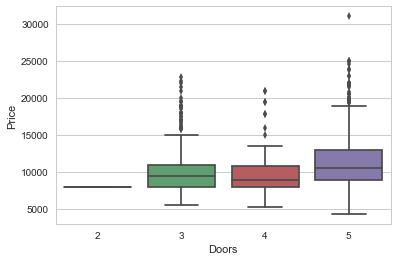

5    486
3    439
4     93
2      1
Name: Doors, dtype: int64

In [15]:
sns.boxplot(x="Doors", y="Price", data=train_df)
plt.show()

train_df['Doors'].value_counts()

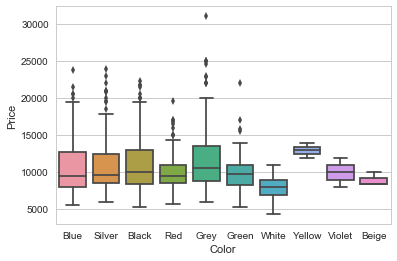

Red       207
Grey      207
Blue      206
Green     149
Black     132
Silver     90
White      21
Beige       3
Yellow      2
Violet      2
Name: Color, dtype: int64

In [16]:
sns.boxplot(x="Color", y="Price", data=train_df)
plt.show()

train_df['Color'].value_counts()

#### 질적함수들을 군집화 하는게 필요할 것 같다.